In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine=pd.read_csv("E:\Data science training\R AND PYTHON KPMG\stat and ml\ASSIGNMENT\Wine Clustering.csv")
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Building the clustering model:

In [3]:
from sklearn.cluster import KMeans

In [4]:
##Plotting the elbow value first
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [5]:
error = []
for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(wine)
    error.append(km.inertia_)

C:\Users\Pratik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
error

[17592296.383508474,
 4543749.614531862,
 2370689.686782968,
 1333139.2086165315,
 935752.2742960759,
 647326.0020260846,
 412303.8282508013,
 323223.24705426674,
 272977.0201661897,
 218119.38847158226]

C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


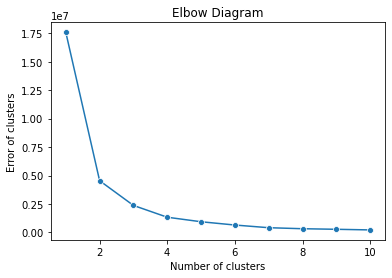

In [7]:
#Plottin the elbow curve
sns.lineplot(range(1,11),error,marker='o')
plt.title('Elbow Diagram')
plt.xlabel('Number of clusters')
plt.ylabel('Error of clusters')
plt.show()

In [8]:
## from above Elbow Diagram We can say that no of Cluster =4 bcz from cluster 4 yhere not much change in the graph


In [9]:
km_4 = KMeans(n_clusters=4).fit(wine)

In [10]:
clusters = km_4.fit_predict(wine)

In [11]:
wine['Cluster'] = clusters
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [12]:
## Interference of Each cluster
wine['Cluster'].value_counts()

2    59
0    57
1    39
3    23
Name: Cluster, dtype: int64

In [13]:
## each Cluster have different value. we can see that most of the Data Points are belongs to Cluster 1 and Cluster 3

In [14]:
wine.groupby('Cluster')[['Alcohol','Ash_Alcanity','Total_Phenols','Color_Intensity','Proline']].mean().reset_index()

,Cluster,Alcohol,Ash_Alcanity,Total_Phenols,Color_Intensity,Proline
0,0,12.475088,20.636842,2.105789,3.952105,435.578947
1,1,13.459487,18.125641,2.594359,5.219231,985.589744
2,2,12.870000,20.240678,2.027627,5.551525,659.220339
3,3,13.860000,17.073913,2.943043,6.260000,1338.565217


C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

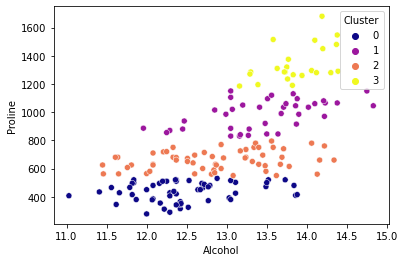

In [15]:
## I am taking two numeric columns are Alcohol and Proline and plot a scatter plot 
sns.scatterplot(wine['Alcohol'],wine['Proline'],hue=wine['Cluster'],palette='plasma')

C:\Users\Pratik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Proline', ylabel='Alcohol'>

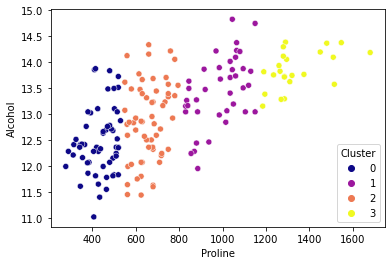

In [16]:
sns.scatterplot(wine['Proline'],wine['Alcohol'],hue=wine['Cluster'],palette='plasma')